# Verificação da estabilidade de um pilar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from nFNC_functions import *
from Entrada_de_dados import *
from ELUi_functions import *

In [2]:
fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, M_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b = Entrada_de_dados()
m = 5
l_e = 20*h

In [3]:
Rompeu, e, f = Verificacao_DF(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, M_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e)
print(Rompeu, e, f)

False 0.16666666666666666 0.03151859892064612


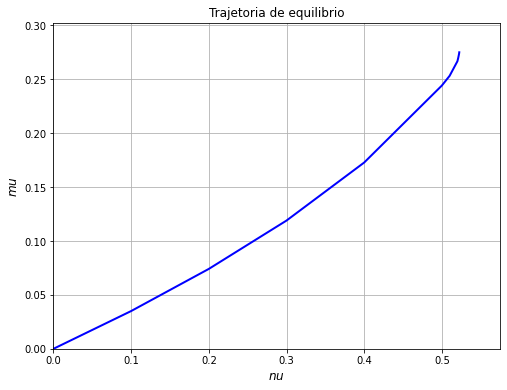

In [4]:
N, M = Curva_de_projeto_ELUi(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e, e)
nu = np.array(N)/(sigma_cd*b*h)
mu = np.array(M)/(sigma_cd*b*h**2)

In [5]:
N_cr = N[-1]
M_cr = M[-1]
print('N_cr: {:.4f} kN'.format(N_cr*1e3))
print('M_cr: {:.2f} kNcm'.format(M_cr*1e5))

N_cr: 634.3429 kN
M_cr: 16692.80 kNcm


In [6]:
N_r, M_r = N_r_M_r(epsilon_c2, epsilon_cu, sigma_cd, n, b, f_yd, epsilon_yd, h, y_t, y_b, y_s, phi, nb, tol_k)
nu_r = np.array(N_r)/(sigma_cd*b*h)
mu_r = np.array(M_r)/(sigma_cd*b*h**2)
print(nu_r,mu_r)


[ 1.3864      1.38589269  1.3853465   1.38476145  1.38413754  1.38347475
  1.38181582  1.37978241  1.37771014  1.375599    1.37344899  1.37126011
  1.36903236  1.36676574  1.36446026  1.3621159   1.35973268  1.35731059
  1.35484963  1.3523498   1.3498111   1.34723354  1.3446171   1.3419618
  1.33926763  1.33653458  1.33376267  1.33095189  1.32810225  1.32521373
  1.32228635  1.31932009  1.31631497  1.31327098  1.31018812  1.30706639
  1.30390579  1.30070633  1.29746799  1.29419079  1.29087472  1.28751978
  1.28412597  1.28069329  1.27722174  1.27371132  1.27016204  1.26657389
  1.26294686  1.25928097  1.25557621  1.25183259  1.24805009  1.24422872
  1.24036849  1.23646939  1.23253141  1.22855457  1.22453886  1.22048429
  1.21639084  1.21225852  1.20808734  1.20387729  1.19962836  1.19534057
  1.19101392  1.18664839  1.18224399  1.17780073  1.17331859  1.16879759
  1.16423772  1.15963898  1.15500137  1.15032489  1.14560954  1.14085533
  1.13606225  1.13123029  1.12635947  1.12144978  1.

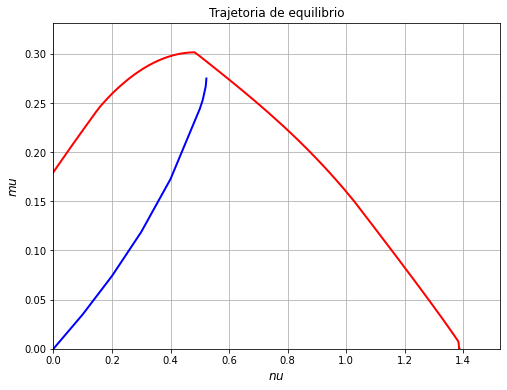

In [10]:


plt.figure(figsize=(8, 6))
plt.plot(nu, mu, '-b', linewidth=2)
plt.plot(nu_r, mu_r, '-r', linewidth=2)
plt.xlabel('$ nu $', fontsize=12)
plt.ylabel('$ mu $', fontsize=12)
plt.xlim(min(nu), max(nu_r) * 1.1)
plt.ylim(min(mu), max(mu_r) * 1.1)
plt.title('Trajetoria de equilibrio', fontsize=12)
# plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [ ]:
i = 1
e = np.zeros(15)
N_cr = np.zeros(15)
M_cr = np.zeros(15)

while i <= 14:
    e[i] = i*h/10
    N_cr[i], M_cr[i] = Normal_critica(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e, e[i])
    i = i + 1

In [ ]:
mu = np.zeros(15)
print('e(m) | mu')
for i in range(len(e)):
    if i != 0:
        mu[i] = N_cr[i]/(sigma_cd*b*h)
        formatted_string = '{:.1f}  | {:.5f}'.format(e[i]/h,mu[i])
        print(formatted_string)